# Understanding Customer Behavior and Product Performance – A Deep Dive with SQL

## Table of Contents

- [1. Introduction](#1.-Introduction)
- [2. Exploring the Scale Model Products Database](#2.-Exploring-the-Scale-Model-Products-Database)
- [3. Identifying Priority Products for Restocking Based on Low Stock and High Performance](#3.-Identifying-Priority-Products-for-Restocking-Based-on-Low-Stock-and-High-Performance)
- [4. Identifying VIP and Less Engaged Customers Based on Profit](#4.-Identifying-VIP-and-Less-Engaged-Customers-Based-on-Profit)
    - [4.1. Calculating the Profit Each Customer Generates](#4.1.-Calculating-the-Profit-Each-Customer-Generates)
    - [4.2. Finding the VIP and Less Engaged Customers](#4.2.-Finding-the-VIP-and-Less-Engaged-Customers)
- [5. Analyzing Monthly Customer Metrics and Calculating the Customer Lifetime Value](#5.-Analyzing-Monthly-Customer-Metrics-and-Calculating-the-Customer-Lifetime-Value)
    - [5.1. Calculating Monthly Total Customers, New Customers, and Payments](#5.1.-Calculating-Monthly-Total-Customers,-New-Customers,-and-Payments)
    - [5.2. Calculating Monthly Percentage of New Customers and Payments](#5.2.-Calculating-Monthly-Percentage-of-New-Customers-and-Payments)
    - [5.3. Calculating the Customer Lifetime Value (CLTV)](#5.3.-Calculating-the-Customer-Lifetime-Value-(CLTV))
- [6. Conclusion](#6.-Conclusion)

## 1. Introduction

Data analysis has proven to be highly effective in sales. By extracting [key performance indicators](https://www.investopedia.com/terms/k/kpi.asp) (KPIs), we can make smarter decisions, ultimately saving time, resources, and money. In addition, sales data analysis can cover various aspects, including sales, production, customer experience, and employee efficiency.

The goal of this project is to analyze data from a sales records database for scale model products and extract information for decision-making. Below are three questions we aim to answer through this project:

1. **Which products should we order more of or less of?**
2. **How should we tailor marketing and communication strategies to customer behaviors?**
3. **How much can we spend on acquiring new customers?**

Soon, we'll delve into the database and explore methods for manipulating it.

## 2. Exploring the Scale Model Products Database

First, we'll explore the database. The scale model products database schema is as follows:

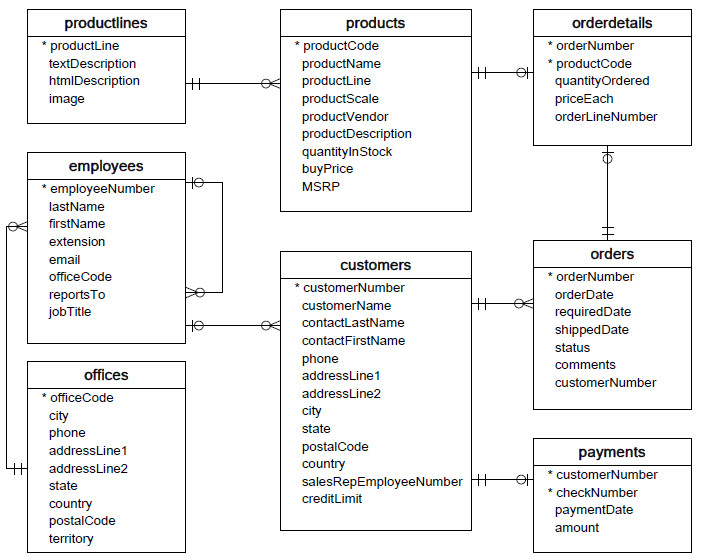

Based on the database schema, we observe the following:

- The schema includes tables for products, customers, employees, orders, and offices.
- Each table has a primary key, serving as a unique identifier for each record.
- The tables are related through foreign keys. A [foreign key](https://www.w3schools.com/sql/sql_foreignkey.asp) is the column(s) in one table that references the primary key in another table. Conversely, a [primary key](https://www.w3schools.com/sql/sql_primarykey.asp) is the column(s) containing values that uniquely identify each row in a table.

Furthermore, the database contains eight tables:

- `Customers` – customer data.
- `Employees` – employee information.
- `Offices` – sales office information.
- `Orders` – customers' sales orders.
- `OrderDetails` – sales order line for each sales order.
- `Payments` – customers' payment records.
- `Products` – scale model products.
- `ProductLines` – product line categories.

Next, let's write some queries to explore the scale model products database.

In [1]:
# Import the relevant libraries
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('Datasets/stores.db')

# Select all columns from the 'products' table, and limit the results to the first 5 rows
query = '''SELECT *
             FROM products
            LIMIT 5;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [2]:
# Count the number of rows in the 'products' table, and alias the result as 'lineCount'
query = '''SELECT COUNT(*) AS lineCount
             FROM products;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,lineCount
0,110


Based on the outputs above:

- The products span across different product lines such as `Motorcycles` and `Classic Cars`, and are supplied by various vendors like `Min Lin Diecast` and `Classic Metal Creations`.
- Detailed descriptions are provided for each product, highlighting features and characteristics.
- The quantity in stock varies for each product, ranging from a few units to thousands of units.
- The buy price and [manufacturer's suggested retail price](https://www.investopedia.com/terms/m/manufacturers-suggested-retail-price-msrp.asp) (MSRP) differ for each product, indicating potential profit margins or pricing strategies.
- There are `110` products listed in the dataset.

In [3]:
# Retrieve table names in the database along with their corresponding number of attributes and rows
query = '''SELECT 'Customers' AS tableName,
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Customers')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Customers

            UNION

           SELECT 'Products' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Products')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Products

            UNION

           SELECT 'ProductLines' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('ProductLines')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM ProductLines

            UNION

           SELECT 'Orders' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Orders')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Orders

            UNION

           SELECT 'OrderDetails' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('OrderDetails')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM OrderDetails  

            UNION

           SELECT 'Payments' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Payments')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Payments

            UNION

           SELECT 'Employees' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Employees')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Employees

            UNION

           SELECT 'Offices' AS tableName, 
                  (SELECT COUNT(*)
                     FROM pragma_table_info('Offices')) AS numberOfAttributes,
                  COUNT(*) AS numberOfRows
             FROM Offices;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,tableName,numberOfAttributes,numberOfRows
0,Customers,13,122
1,Employees,8,23
2,Offices,9,7
3,OrderDetails,5,2996
4,Orders,7,326
5,Payments,4,273
6,ProductLines,4,7
7,Products,9,110


From the output, we can draw several insights about the database:

- The table with the largest number of rows is `OrderDetails` with `2,996` rows, indicating it contains detailed information about individual sales orders. Additionally, the `Products` table contains `110` rows, suggesting a diverse range of scale model products. Other tables like `Customers` and `Orders` have moderate row counts, indicating a substantial customer base and order volume.
- The `Customers` table has the highest number of attributes (`13`), indicating a comprehensive set of customer data being stored. In addition, the `Products` and `Orders` tables also have a relatively high number of attributes, suggesting detailed information about products and orders. Conversely, the `Payments` and `ProductLines` tables have the lowest number of attributes (`4`).
- The `Employees` table contains data for `23` employees, with `8` attributes, whereas the `Offices` table provides information about `7` sales offices, with `9` attributes.
- The `Payments` table contains `273` payment records, with `4` attributes. These payment records include details about customer numbers, check numbers, payment dates, and payment amounts.
- The `ProductLines` table consists of `7` rows, indicating there are `7` distinct categories or lines of scale model products available. Each category is described by text, while no HTML descriptions or images are provided.

## 3. Identifying Priority Products for Restocking Based on Low Stock and High Performance

Now that we have a better understanding of the database, we can address the first question: *which products should we order more of or less of?* This question pertains to inventory management, considering factors such as **low stock** (indicating high demand) and **product performance**. 

By optimizing our supply based on these factors, we can enhance the user experience and prevent popular products from going out-of-stock. Here are a few points to consider:

- Low stock is calculated as the ratio of the sum of each product ordered to the quantity of product in stock. We will focus on the ten highest ratios, indicating the top ten products that are nearly or completely out-of-stock.
- Product performance is the total sales generated per product.
- Priority for restocking will be given to products with high product performance that are close to running out of stock.

We'll use the following mathematical expressions and tables to perform our calculations:

$$low\hspace{1 mm}stock = \frac{SUM(quantityOrdered)}{quantityInStock}$$

$$product\hspace{1 mm}performance = SUM(quantityOrdered × priceEach)$$

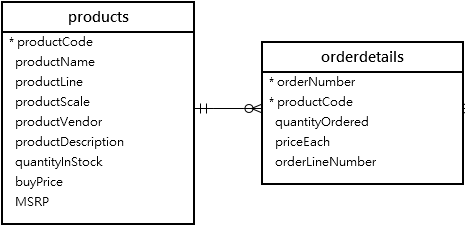

In [4]:
# Calculate the ratio of total quantity ordered to quantity in stock 
# and select the top 10 products with low stock
query = '''SELECT od.productCode, 
                  ROUND(SUM(od.quantityOrdered) * 1.0 /
                        (SELECT quantityInStock
                           FROM products p
                          WHERE od.productCode = p.productCode), 2) AS lowStock
             FROM orderdetails od
            GROUP BY productCode
            ORDER BY lowStock DESC
            LIMIT 10;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,productCode,lowStock
0,S24_2000,67.67
1,S12_1099,13.72
2,S32_4289,7.15
3,S32_1374,5.70
4,S72_3212,2.31
5,S700_3167,1.90
6,S50_4713,1.65
7,S18_2795,1.61
8,S18_2248,1.54
9,S700_1938,1.22


We observe that the product with code `S24_2000` has the highest ratio of total quantity ordered to quantity in stock, indicating it is nearly out of stock. Following `S24_2000`, `S12_1099` has a relatively high ratio, suggesting it is also in high demand. However, the remaining products in the list have progressively lower ratios, indicating varying degrees of demand relative to stock levels.

In [5]:
# Calculate product performance by summing the total sales value for each product code
# and select the top 10 performers
query = '''SELECT productCode, 
                  SUM(quantityOrdered * priceEach) AS prodPerformance
             FROM orderdetails
            GROUP BY productCode 
            ORDER BY prodPerformance DESC
            LIMIT 10;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,productCode,prodPerformance
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
5,S12_3891,152543.02
6,S18_1662,144959.91
7,S18_2238,142530.63
8,S18_1749,140535.60
9,S12_2823,135767.03


The product with code `S18_3232` has the highest product performance, indicating it has generated the highest total sales value. Following `S18_3232`, `S12_1108` and `S10_1949` also demonstrate strong performance. However, the remaining products in the list exhibit progressively lower total sales values, indicating varying degrees of performance.

Finally, let's use a [Common Table Expression](https://www.atlassian.com/data/sql/using-common-table-expressions) (CTE) to display priority products for restocking based on low stock and high performance.

In [6]:
# Identify the top 10 priority products for restocking based on low stock and high performance
query = '''WITH 
           low_stock AS (
           SELECT od.productCode, 
                  ROUND(SUM(od.quantityOrdered) * 1.0 /
                        (SELECT quantityInStock
                           FROM products p
                          WHERE od.productCode = p.productCode), 2) AS lowStock
             FROM orderdetails od
            GROUP BY productCode
            ORDER BY lowStock DESC
            LIMIT 10
           )

           SELECT p.productName, p.productLine,
                  SUM(od.quantityOrdered * od.priceEach) AS prodPerformance
             FROM orderdetails od
             JOIN products p
               ON od.productCode = p.productCode
            WHERE od.productCode IN (SELECT DISTINCT productCode 
                                       FROM low_stock)
            GROUP BY od.productCode 
            ORDER BY prodPerformance DESC
            LIMIT 10;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,productName,productLine,prodPerformance
0,1968 Ford Mustang,Classic Cars,161531.48
1,1928 Mercedes-Benz SSK,Vintage Cars,132275.98
2,1997 BMW F650 ST,Motorcycles,89364.89
3,F/A 18 Hornet 1/72,Planes,76618.40
4,2002 Yamaha YZR M1,Motorcycles,73670.64
5,The Mayflower,Ships,69531.61
6,1960 BSA Gold Star DBD34,Motorcycles,67193.49
7,1928 Ford Phaeton Deluxe,Vintage Cars,60493.33
8,Pont Yacht,Ships,47550.40
9,1911 Ford Town Car,Vintage Cars,45306.77


The product `1968 Ford Mustang` emerges as the top priority for restocking, and others such as `1928 Mercedes-Benz SSK` and `1997 BMW F650 ST` also exhibit a balance of high performance and low stock, making them priority candidates for restocking. Similarly, the rest of the products in the list demonstrate a combination of high performance and low stock, warranting attention for restocking efforts.

As for the product lines, `Classic Cars` appear to have the highest performance, followed by `Vintage Cars` and `Motorcycles`. `Planes` and `Ships` also show notable performance, while `Ships` have the lowest performance among the listed product lines.

By focusing on these priority products, the inventory management strategy can effectively address both demand and stock availability to optimize sales and customer satisfaction.

## 4. Identifying VIP and Less Engaged Customers Based on Profit

### 4.1. Calculating the Profit Each Customer Generates

After exploring various products, we'll delve into customer information to address the second question: *how should we tailor marketing and communication strategies to customer behaviors?* This entails categorizing customers by identifying VIP (very important person) customers and those who are less engaged:

- VIP customers generate the highest profit for the store.
- Less-engaged customers generate lower profits.

For example, we could organize events to enhance loyalty among VIPs, and launch campaigns to re-engage less-engaged customers. Before we proceed, let's calculate the profit generated by each customer. To do this, we'll require the following tables:

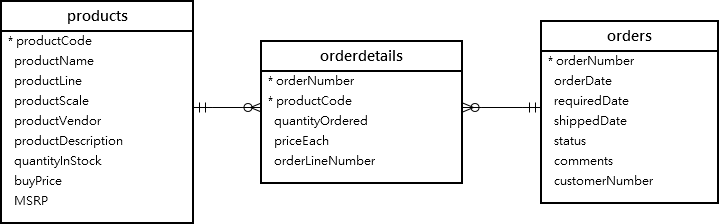

In [7]:
# Identify the top 10 customers with the highest profit values
query = '''SELECT o.customerNumber, 
                  SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS profit
             FROM products p
             JOIN orderdetails od
               ON od.productCode = p.productCode
             JOIN orders o
               ON o.orderNumber = od.orderNumber
            GROUP BY o.customerNumber
            ORDER BY profit DESC
            LIMIT 10;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,customerNumber,profit
0,141,326519.66
1,124,236769.39
2,151,72370.09
3,114,70311.07
4,119,60875.30
5,148,60477.38
6,187,60095.86
7,323,60013.99
8,131,58669.10
9,450,55931.37


Each customer's profit is calculated based on the difference between the total sales revenue `(quantityOrdered × priceEach)` and the total cost of the products `(quantityOrdered × buyPrice)`. Customers with higher profit values, such as customer number `141` and `124`, generate substantial profits for the store. Conversely, customers with lower profit values contribute comparatively less to the store's profit.

### 4.2. Finding the VIP and Less Engaged Customers

Understanding individual customer profitability helps identify high-value customers who are crucial for the store's financial performance. Tailoring marketing strategies based on this data helps enhance customer retention and drive revenue growth. Next, we'll identify VIP and less engaged customers using profit per customer from the previous query.

In [8]:
# Select the top 5 customers with the highest profit
query = '''WITH 
           profit_by_customer AS (
           SELECT o.customerNumber, 
                  SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS profit
             FROM products p
             JOIN orderdetails od
               ON od.productCode = p.productCode
             JOIN orders o
               ON o.orderNumber = od.orderNumber
            GROUP BY o.customerNumber
           )

           SELECT contactFirstName, contactLastName,
                  city, country, pc.profit
             FROM customers c
             JOIN profit_by_customer pc
               ON pc.customerNumber = c.customerNumber
            ORDER BY pc.profit DESC
            LIMIT 5;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,contactFirstName,contactLastName,city,country,profit
0,Diego,Freyre,Madrid,Spain,326519.66
1,Susan,Nelson,San Rafael,USA,236769.39
2,Jeff,Young,NYC,USA,72370.09
3,Peter,Ferguson,Melbourne,Australia,70311.07
4,Janine,Labrune,Nantes,France,60875.30


Based on the output:

1. `Diego Freyre` from Madrid, Spain, generated the highest profit of `326,519.66` USD.
2. `Susan Nelson` from San Rafael, USA, follows closely with a profit of `236,769.39` USD.
3. `Jeff Young` from NYC, USA, ranks third with a profit of `72,370.09` USD.
4. `Peter Ferguson` from Melbourne, Australia, ranks fourth with a profit of `70,311.07` USD.
5. `Janine Labrune` from Nantes, France, rounds up the top five with a profit of `60,875.30` USD.

In [9]:
# Select the top 5 customers with the lowest profit
query = '''WITH 
           profit_by_customer AS (
           SELECT o.customerNumber, 
                  SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS profit
             FROM products p
             JOIN orderdetails od
               ON od.productCode = p.productCode
             JOIN orders o
               ON o.orderNumber = od.orderNumber
            GROUP BY o.customerNumber
           )

           SELECT contactFirstName, contactLastName,
                  city, country, pc.profit
             FROM customers c
             JOIN profit_by_customer pc
               ON pc.customerNumber = c.customerNumber
            ORDER BY pc.profit ASC
            LIMIT 5;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,contactFirstName,contactLastName,city,country,profit
0,Mary,Young,Glendale,USA,2610.87
1,Leslie,Taylor,Brickhaven,USA,6586.02
2,Franco,Ricotti,Milan,Italy,9532.93
3,Carine,Schmitt,Nantes,France,10063.80
4,Thomas,Smith,London,UK,10868.04


Based on the output:

1. `Mary Young` from Glendale, USA, generated the lowest profit among the top five customers with the lowest profit, totaling `2,610.87` USD.
2. `Leslie Taylor` from Brickhaven, USA, follows with a profit of `6,586.02` USD.
3. `Franco Ricotti` from Milan, Italy, ranks third lowest with a profit of `9,532.93` USD.
4. `Carine Schmitt` from Nantes, France, has a profit of `10,063.80` USD, placing fourth lowest.
5. `Thomas Smith` from London, UK, rounds up the top five lowest profits with `10,868.04` USD.

## 5. Analyzing Monthly Customer Metrics and Calculating the Customer Lifetime Value

### 5.1. Calculating Monthly Total Customers, New Customers, and Payments

Before addressing the third and final question: *how much can we spend on acquiring new customers?* Let's determine the percentage of new customers arriving each month relative to the total customers. This way, we can assess if it's worthwhile to invest in acquiring new customers.

Before we do that, let's first calculate the total number of customers, identify the number of new customers, and their total payments each month.

In [10]:
# Calculate the total number of customers, identify the number of new customers,
# their total payments each month, and limit the results to the first 10 rows
query = '''WITH 
           payment_date_converted AS (
           SELECT *, 
                  CAST(SUBSTR(paymentDate, 1,4) AS INTEGER)*100 + 
                  CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS yearMonth
             FROM payments
           ),

           monthly_customers_totals AS (
           SELECT yearMonth, 
                  COUNT(*) AS numberOfCustomers, SUM(amount) AS total
             FROM payment_date_converted
            GROUP BY yearMonth
           )

           SELECT p1.yearMonth, 
                  COUNT(*) AS numberOfNewCustomers, SUM(p1.amount) AS newCustomersTotal,
                  (SELECT numberOfCustomers
                     FROM monthly_customers_totals mc
                    WHERE mc.yearMonth = p1.yearMonth) AS numberOfCustomers,
                  (SELECT total
                     FROM monthly_customers_totals mc
                    WHERE mc.yearMonth = p1.yearMonth) AS total
             FROM payment_date_converted p1
            WHERE p1.customerNumber NOT IN (SELECT customerNumber
                                              FROM payment_date_converted p2
                                             WHERE p2.yearMonth < p1.yearMonth)
            GROUP BY p1.yearMonth
            LIMIT 10;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,yearMonth,numberOfNewCustomers,newCustomersTotal,numberOfCustomers,total
0,200301,3,26267.62,3,26267.62
1,200302,3,144384.36,3,144384.36
2,200303,5,199704.48,5,199704.48
3,200304,7,136313.92,7,136313.92
4,200305,6,159881.97,6,159881.97
5,200306,5,180218.98,5,180218.98
6,200307,6,108075.71,8,158247.00
7,200308,4,133422.26,6,246204.86
8,200309,4,154574.87,5,161206.23
9,200310,9,219683.03,13,316857.96


The output displays the number of new customers and their total payments in the first `10` months of `2003`, alongside the total number of customers and payments for each respective month. There's a fluctuation in the number of new customers and their payments, indicating varying customer acquisition and spending patterns. Additionally, there's a general upward trend in total customers and payments over the same period, suggesting potential growth in sales or customer activity.

### 5.2. Calculating Monthly Percentage of New Customers and Payments

With the previous query, we can compute the percentage of new customers and their payments relative to the total customers and payments each month.

In [11]:
# Calculate the percentage of new customers and their payments
# relative to the total customers and payments each month
query = '''WITH 
           payment_date_converted AS (
           SELECT *, 
                  CAST(SUBSTR(paymentDate, 1,4) AS INTEGER)*100 + 
                  CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS yearMonth
             FROM payments
           ),

           monthly_customers_totals AS (
           SELECT yearMonth, 
                  COUNT(*) AS numberOfCustomers, SUM(amount) AS total
             FROM payment_date_converted
            GROUP BY yearMonth
           ),

           monthly_new_customers_totals AS (
           SELECT p1.yearMonth, 
                  COUNT(*) AS numberOfNewCustomers, SUM(p1.amount) AS newCustomersTotal,
                  (SELECT numberOfCustomers
                     FROM monthly_customers_totals mc
                    WHERE mc.yearMonth = p1.yearMonth) AS numberOfCustomers,
                  (SELECT total
                     FROM monthly_customers_totals mc
                    WHERE mc.yearMonth = p1.yearMonth) AS total
             FROM payment_date_converted p1
            WHERE p1.customerNumber NOT IN (SELECT customerNumber
                                              FROM payment_date_converted p2
                                             WHERE p2.yearMonth < p1.yearMonth)
            GROUP BY p1.yearMonth
           )

           SELECT yearMonth, 
                  ROUND(numberOfNewCustomers*100 / numberOfCustomers, 1) AS numberOfNewCustomersPct,
                  ROUND(newCustomersTotal*100 / total, 1) AS newCustomersTotalPct
             FROM monthly_new_customers_totals;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,yearMonth,numberOfNewCustomersPct,newCustomersTotalPct
0,200301,100.0,100.0
1,200302,100.0,100.0
2,200303,100.0,100.0
3,200304,100.0,100.0
4,200305,100.0,100.0
5,200306,100.0,100.0
6,200307,75.0,68.3
7,200308,66.0,54.2
8,200309,80.0,95.9
9,200310,69.0,69.3


As we can see, the percentage of new customers and their payments relative to the total has been decreasing since `2003`, with the lowest values occurring in `2004`. The year `2005`, which is present in the database, is absent from the output above. This indicates that the store has not acquired any new customers since September `2004`. Therefore, it makes sense to invest in acquiring new customers.

### 5.3. Calculating the Customer Lifetime Value (CLTV)

To determine our budget for acquiring new customers, we can calculate the [customer lifetime value](https://www.shopify.com/blog/what-is-customer-lifetime-value#1) (CLTV). This metric indicates the total net profit a company can expect to generate from a customer throughout their entire relationship. Therefore, we will be able to determine how much we can spend on marketing.

In [12]:
# Calculate the Customer Lifetime Value (CLTV) based on average profit per customer
query = '''WITH 
           profit_by_customer AS (
           SELECT o.customerNumber, SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)) AS profit
             FROM products p
             JOIN orderdetails od
               ON od.productCode = p.productCode
             JOIN orders o
               ON o.orderNumber = od.orderNumber
            GROUP BY o.customerNumber
           )

           SELECT ROUND(AVG(pc.profit), 2) AS CLTV
             FROM profit_by_customer pc;'''

# Read the query results into a pandas DataFrame
data = pd.read_sql_query(query, conn)
data

,CLTV
0,39039.59


The customer lifetime value (CLTV) returned a value of `$39,039.59`. This indicates that the business can expect to generate a total net profit of `39,039.59` USD from a customer throughout their entire relationship.

By allocating a portion of this CLTV value toward customer acquisition costs, the business can strategically invest in acquiring new customers while ensuring profitability over the long term.

In [13]:
# Close the connection to the SQLite database
conn.close()

## 6. Conclusion

In this project, we analyzed data from a sales records database for scale model products and extracted insights by addressing three key questions. Upon exploring the database, we identified `8` tables covering products, customers, employees, orders, and offices, each containing detailed information. Additionally, we observed that the products span across different product lines and are sourced from various vendors.

The first question – *which products should we order more of or less of?* – is crucial for inventory management, taking into account factors like stock levels and product performance. Our analysis revealed that the `1968 Ford Mustang` stands out as a top priority for restocking, while products like the `1928 Mercedes-Benz SSK` and `1997 BMW F650 ST` also demonstrate a balance of high performance and low stock. Among product lines, `Classic Cars` show the highest performance, followed by `Vintage Cars` and `Motorcycles`. Notably, `Planes` and `Ships` also perform well, with `Ships` having the lowest performance among the listed product lines. Focusing on priority products enables an effective inventory management strategy to balance demand and stock availability, optimizing sales and customer satisfaction.

The second question – *how should we tailor marketing and communication strategies to customer behaviors?* – involves categorizing customers into VIP and less engaged segments. We can enhance loyalty among VIPs through special events and re-engage less-engaged customers with targeted campaigns. By calculating the profit generated by each customer, we identified VIPs and less engaged customers. With the top `5` customers with the highest and lowest profit identified, we can strategize to enhance loyalty and attract more customers.

Before delving into the third question – *how much can we spend on acquiring new customers?* – we evaluated the percentage of new customers arriving each month relative to the total customers. Our analysis revealed fluctuations in the number of new customers and their payments, alongside a general uptrend in total customers and payments over the first `10` months of `2003`. Furthermore, the percentage of new customers and their payments relative to the total has been declining since `2003`, with the lowest values occurring in `2004`. Given the absence of new customer acquisitions since September `2004`, we decided it would be logical to invest in acquiring new customers.

Finally, we calculated the customer lifetime value (CLTV) to determine our budget for acquiring new customers. With CLTV yielding `$39,039.59`, the business can expect to generate this amount in total net profit from a customer throughout their entire relationship. By allocating a portion of this CLTV value toward customer acquisition costs, the business can strategically invest in acquiring new customers while ensuring profitability over the long term.